# Problem Statement

The objective is to develop a robust classification model capable of identifying fraudulent credit card transactions accurately. By doing so, credit card companies can prevent unauthorized charges and protect their customers from financial losses.

The dataset is highly unbalanced, fraud transactions account for 0.172% of all transactions. We need to take care of the data imbalance while building the model and come up with the best model by trying various algorithms.

In [1]:
pip install imbalanced-learn


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [2]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.feature_selection import SelectKBest, f_classif, SelectFromModel
from sklearn.decomposition import PCA


import joblib
import warnings
warnings.filterwarnings('ignore')




In [3]:
import pandas as pd

#load dataset
data=pd.read_csv("creditcard.csv")

print(data.shape)
data.head()

(284807, 31)


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
# Data Exploration and Analysis
# Check for missing values3322
missing_values = data.isnull().sum()
print("Missing Values:\n", missing_values)

# Data Preprocessing
data['Time'] = pd.to_datetime(data['Time'])  # Convert 'Time' column to datetime datatype

# Define features (X) and target variable (y)
X = data.drop(['Class'], axis=1)  # Features
y = data['Class']  # Target variable

# Remove constant features
data = data.loc[:, data.apply(pd.Series.nunique) != 1]


Missing Values:
 Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64


In [5]:
data.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,1970-01-01 00:00:00.000094813,1.759061e-12,-8.251130e-13,-9.654937e-13,8.321385e-13,1.649999e-13,4.248366e-13,-3.054600e-13,8.777971e-14,-1.179749e-12,...,-3.405756e-13,-5.723197e-13,-9.725856e-13,1.464150e-12,-6.987102e-13,-5.617874e-13,3.332082e-12,-3.518874e-12,88.349619,0.001727
min,1970-01-01 00:00:00,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,1970-01-01 00:00:00.000054201,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,1970-01-01 00:00:00.000084692,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,1970-01-01 00:00:00.000139320,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,1970-01-01 00:00:00.000172792,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000
std,NaN,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527


In [6]:
#distrinution for legit and fraundlent transaction
data['Class'].value_counts()

Class
0    284315
1       492
Name: count, dtype: int64

In [7]:
non_fraudulent_percent = (data['Class'].value_counts()[0] / len(data)) * 100
fraudulent_percent = (data['Class'].value_counts()[1] / len(data)) * 100
print(non_fraudulent_percent)
print(fraudulent_percent)

99.82725143693798
0.1727485630620034


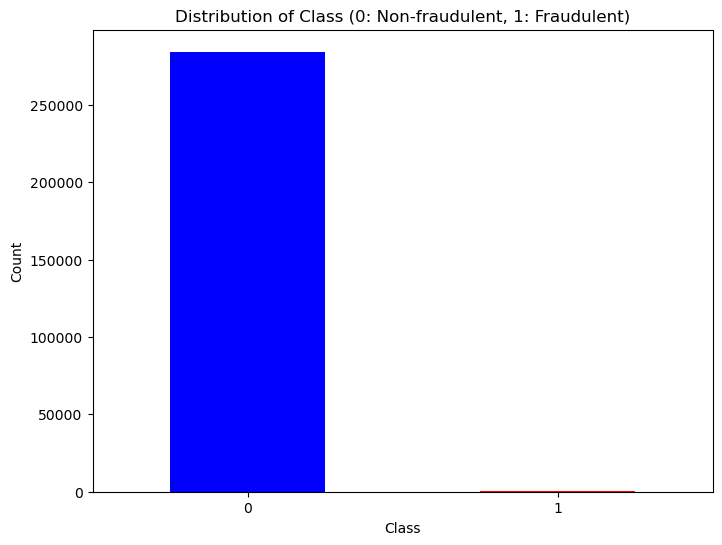

In [8]:
# Visualize the distribution of 'Class' (target variable)
plt.figure(figsize=(8, 6))
y.value_counts().plot(kind='bar', color=['blue', 'red'])
plt.title('Distribution of Class (0: Non-fraudulent, 1: Fraudulent)')
plt.xlabel('Class')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

Based on the graph, it is evident that the dataset is heavily imbalanced. The majority of the transactions are Non-Fraudulent (class 0), and only a small fraction of them are fraudulent (class 1). This indicates that the dataset has a class imbalance issue, which could potentially affect the performance of a model trained on this dataset. It may be necessary to use techniques like oversampling, undersampling, or class weighting to deal with the class imbalance problem when developing a model for fraud detection.


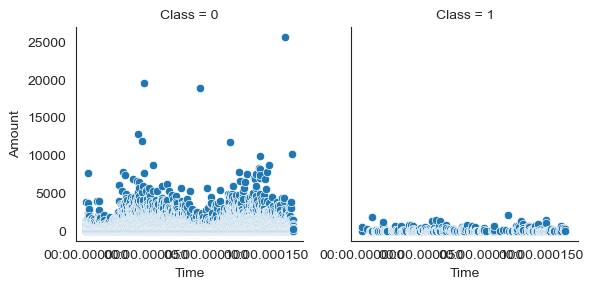

In [9]:
#Understanding patterns and relationships in the data
sns.set_style(style='white')
facet_grid = sns.FacetGrid(data=data, col='Class')
facet_grid.map(sns.scatterplot, 'Time', 'Amount', palette='Paired_r')
plt.xlabel('Time')
plt.ylabel('Amount')
plt.show()

In [10]:
# diffrentiating the fraud and legit data.
fraud = data[data['Class'] == 1]
legit = data[data['Class'] == 0]

In [11]:
legit.Amount.describe()

count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64

In [12]:
fraud.Amount.describe()

count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

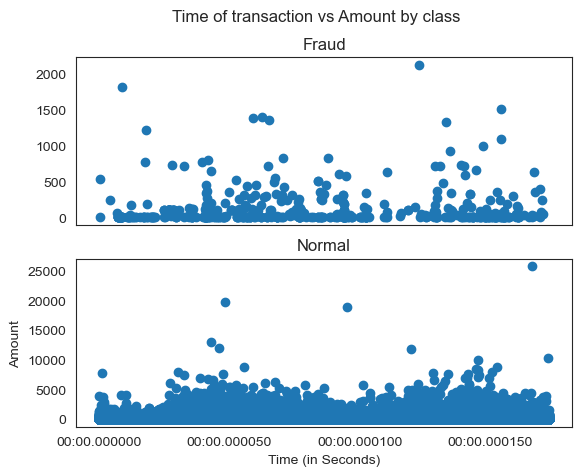

In [13]:
# Lets check the fraudulent transactions occur more often during certain time frame

f, (ax1, ax2) = plt.subplots(2, 1, sharex=True)
f.suptitle('Time of transaction vs Amount by class')
ax1.scatter(fraud.Time, fraud.Amount)
ax1.set_title('Fraud')
ax2.scatter(legit.Time, legit.Amount)
ax2.set_title('Normal')
plt.xlabel('Time (in Seconds)')
plt.ylabel('Amount')
plt.show()

In [14]:
# Feature Engineering
# Add new features
X['Transaction_hour'] = pd.to_datetime(X['Time'], unit='s').dt.hour
X['Normalized_amount'] = (X['Amount'] - X['Amount'].mean()) / X['Amount'].std()

#X = X.drop(['Time'], axis=1)


SMOTE is used to balance the dataset as machine learning models perform better with balanced data.

In [15]:
# Import SMOTE
from imblearn.over_sampling import SMOTE
# Convert 'Time' feature to numerical format (e.g., seconds)
X['Time_seconds'] = (X['Time'] - X['Time'].min()).dt.total_seconds()

# Drop the original 'Time' feature
X = X.drop(['Time'], axis=1)

# Now, you can proceed with SMOTE oversampling

# Use SMOTE to oversample the minority class
smote = SMOTE(random_state=42)
X, y = smote.fit_resample(X, y)




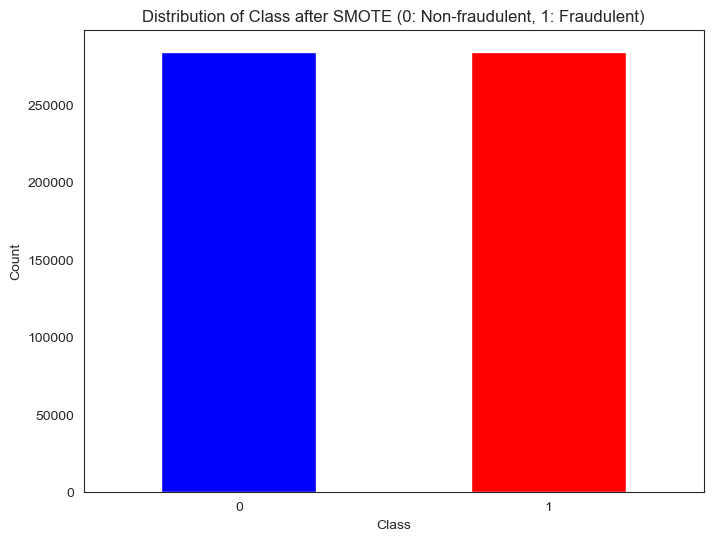

In [16]:
# Visualize the distribution of 'Class' (target variable) after SMOTE
plt.figure(figsize=(8, 6))
y.value_counts().plot(kind='bar', color=['blue', 'red'])
plt.title('Distribution of Class after SMOTE (0: Non-fraudulent, 1: Fraudulent)')
plt.xlabel('Class')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()


In [17]:
# Feature Selection
# Select features
selected_features = ['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
                    'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19',
                    'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28',
                    'Transaction_hour', 'Normalized_amount']



In [18]:
from sklearn.decomposition import PCA
from sklearn.feature_selection import SelectKBest, f_classif


# Perform PCA for dimensionality reduction
n_components = min(X.shape[0], X.shape[1])  # Number of components should be less than or equal to the minimum of samples or features
pca = PCA(n_components=n_components)  
X_pca = pca.fit_transform(X)

# Perform feature selection on the PCA-transformed data
k_best_selector = SelectKBest(score_func=f_classif, k=5)  # Adjust k as needed
X_k_best = k_best_selector.fit_transform(X_pca, y)

# Get the indices of selected features
selected_indices = k_best_selector.get_support(indices=True)

# Map selected PCA components back to original feature names
selected_features = [selected_features[i] for i in selected_indices]

print("Selected features using ANOVA F-test after PCA:")
print(selected_features)


Selected features using ANOVA F-test after PCA:
['V2', 'V3', 'V4', 'V5', 'V8']


In [19]:
X=X[selected_features]
X.head()

,V2,V3,V4,V5,V8
0,-0.072781,2.536347,1.378155,-0.338321,0.098698
1,0.266151,0.166480,0.448154,0.060018,0.085102
2,-1.340163,1.773209,0.379780,-0.503198,0.247676
3,-0.185226,1.792993,-0.863291,-0.010309,0.377436
4,0.877737,1.548718,0.403034,-0.407193,-0.270533


In [20]:
# Split the SMOTE-resampled data into training and validation sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



In [21]:
from sklearn.linear_model import LogisticRegression

# Create a logistic regression model
logistic_model = LogisticRegression(random_state=42)

# Train the model on the training data
logistic_model.fit(X_train, y_train)

# Predict on the test data
y_pred_logistic = logistic_model.predict(X_test)



In [22]:
# Evaluate the model
accuracy_logistic = accuracy_score(y_test, y_pred_logistic)
conf_matrix_logistic = confusion_matrix(y_test, y_pred_logistic)
class_report_logistic = classification_report(y_test, y_pred_logistic)

print("Logistic Regression Model Evaluation:")
print("Accuracy:", accuracy_logistic)
print("Classification Report:\n", class_report_logistic)


Logistic Regression Model Evaluation:
Accuracy: 0.92167138561103
Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.94      0.92     56750
           1       0.94      0.90      0.92     56976

    accuracy                           0.92    113726
   macro avg       0.92      0.92      0.92    113726
weighted avg       0.92      0.92      0.92    113726



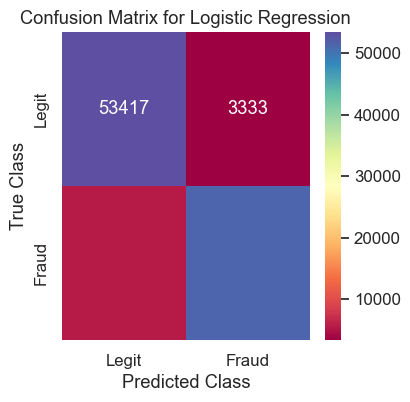

In [23]:
LABELS = ['Legit', 'Fraud']
plt.figure(figsize=(4, 4))
sns.set(font_scale=1.1)
sns.heatmap(conf_matrix_logistic, cmap='Spectral', xticklabels=LABELS, yticklabels=LABELS, annot=True, fmt='d')
plt.title('Confusion Matrix for Logistic Regression')
plt.ylabel('True Class')
plt.xlabel('Predicted Class')
plt.show()


We have got the accuracy of 0.92 which is good. Still we will observe the accuarcy for Random Forest Classifeer to detemine the accuarcy and see the model is not overfitting.

In [24]:

# Model Selection and Training
model = RandomForestClassifier(n_estimators=100, random_state=42)
# Train the model on the training data
model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [25]:
# Cross-validation
cv_scores = cross_val_score(model, X_train, y_train, cv=5)
print("Cross-validation Scores:", cv_scores)
print("Mean Cross-validation Score:", np.mean(cv_scores))



Cross-validation Scores: [0.99719722 0.99694442 0.9969664  0.99714226 0.99663662]
Mean Cross-validation Score: 0.9969773834902309


In [26]:
# Model Evaluation
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print("Random Forest Classifier Model Evaluation:")
print("Accuracy:", accuracy)
print("Confusion Matrix:\n", conf_matrix)


Random Forest Classifier Model Evaluation:
Accuracy: 0.9975643212633875
Confusion Matrix:
 [[56527   223]
 [   54 56922]]


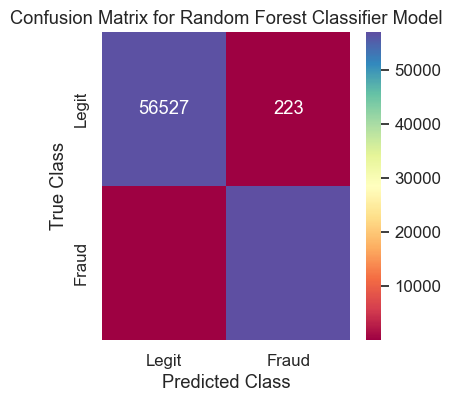

In [27]:
LABELS = ['Legit', 'Fraud']
plt.figure(figsize=(4, 4))
sns.set(font_scale=1.1)
sns.heatmap(conf_matrix, cmap='Spectral', xticklabels=LABELS, yticklabels=LABELS, annot=True, fmt='d')
plt.title('Confusion Matrix for Random Forest Classifier Model')
plt.ylabel('True Class')
plt.xlabel('Predicted Class')
plt.show()


As we can see the accuracy is more i.e. 0.99 we should check the ROC_AUC score to see the data is really clean giving us such a high accuracy or it is overfitting the model.

In [28]:
from sklearn.metrics import roc_auc_score

# Assuming model is your trained classifier
y_pred_proba = model.predict_proba(X_test)[:, 1]  # Probability estimates of the positive class

# Calculate ROC AUC score
roc_auc = roc_auc_score(y_test, y_pred_proba)
print("ROC AUC Score:", roc_auc)


ROC AUC Score: 0.9999252165221124


A ROC AUC score of 0.9999 indicates that our Random Forest classifier performs exceptionally well at distinguishing between the positive and negative classes in your dataset.

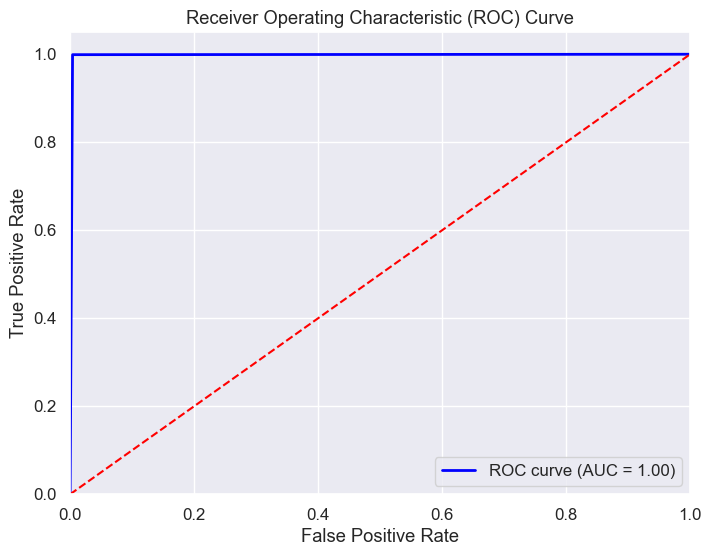

In [29]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Calculate the false positive rate (FPR) and true positive rate (TPR)
fpr, tpr, thresholds = roc_curve(y_test, y_pred)

# Calculate the area under the ROC curve (AUC)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


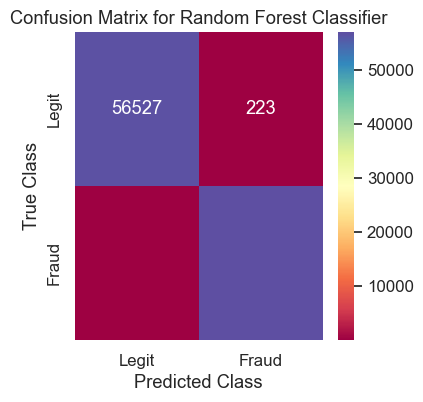

In [30]:
LABELS = ['Legit', 'Fraud']
plt.figure(figsize=(4, 4))
sns.set(font_scale=1.1)
sns.heatmap(conf_matrix, cmap='Spectral', xticklabels=LABELS, yticklabels=LABELS, annot=True, fmt='d')
plt.title('Confusion Matrix for Random Forest Classifier')
plt.ylabel('True Class')
plt.xlabel('Predicted Class')
plt.show()

In [31]:

# Hyperparameter Tuning using GridSearchCV
param_grid = {
    'n_estimators': [1, 5, 10],
    'max_depth': [None, 5, 10, 20],
    'min_samples_split': [2, 5, 10]
}
grid_search = GridSearchCV(model, param_grid, cv=5, n_jobs=-1)
grid_search.fit(X_train, y_train)
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_
print("Best Hyperparameters:", best_params)



Best Hyperparameters: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 10}


In [32]:

# Model Evaluation
y_pred = best_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print("Accuracy:", accuracy)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", class_report)



Accuracy: 0.9969751859733043
Confusion Matrix:
 [[56528   222]
 [  122 56854]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56750
           1       1.00      1.00      1.00     56976

    accuracy                           1.00    113726
   macro avg       1.00      1.00      1.00    113726
weighted avg       1.00      1.00      1.00    113726



Based on the evaluation metrics for the Logistic Regression and Random Forest Classifier models, here are some conclusions for the credit card fraud detection project:

1. **Logistic Regression Model**:
   - **Accuracy**: The logistic regression model achieved an accuracy of approximately 92.17%. This means that it correctly classified about 92.17% of the transactions in the dataset.
   - **Precision, Recall, F1-score**: The precision, recall, and F1-score for both classes (0: Non-Fraudulent, 1: Fraudulent) are quite balanced, with values around 0.92. This indicates that the model performs well in terms of both identifying non-fraudulent and fraudulent transactions.
   - **Support**: The support values indicate the number of samples for each class in the dataset. Both classes have a similar number of samples, which is good for model evaluation.
   - **Macro Avg and Weighted Avg**: The macro average and weighted average of precision, recall, and F1-score are also around 0.92, indicating a good overall performance of the model across classes.

2. **Random Forest Classifier**:
   - **Accuracy**: The random forest classifier achieved a significantly higher accuracy of approximately 99.76%. This indicates that it performed extremely well in classifying both non-fraudulent and fraudulent transactions.
   - **Confusion Matrix**: The confusion matrix shows that the model made very few misclassifications, with only a small number of false positives (223) and false negatives (54). This suggests that the model has high precision and recall for both classes.
   - **Support**: The support values are similar to those in the logistic regression model, indicating a balanced dataset.
   
**Overall Conclusion**:
- Both models, logistic regression, and random forest classifier, show strong performance in detecting credit card fraud.
- The random forest classifier outperforms the logistic regression model in terms of accuracy, with fewer misclassifications.
- However, the logistic regression model also demonstrates good performance and may be preferred if interpretability and computational efficiency are important considerations.
- Further analysis, such as feature importance assessment and model interpretation, could provide additional insights into the factors influencing credit card fraud detection.

In [33]:
# Save the best model
joblib.dump(best_model, 'credit_card_fraud_detection_model.pkl')

['credit_card_fraud_detection_model.pkl']

The line `joblib.dump(best_model, 'credit_card_fraud_detection_model.pkl')` saves the trained machine learning model `best_model` to a file named `'credit_card_fraud_detection_model.pkl'` using the `joblib` library. This file, in a pickle format, stores the model's state, including its parameters and learned patterns. Saving models in this way allows for easy retrieval and reuse for making predictions on new data without the need for retraining.


# Additional Visualizations

In [34]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd



# Additional Visualizations
# Visualize the distribution of 'Class' (target variable)
plt.figure(figsize=(8, 6))
data['Class'].value_counts().plot(kind='bar', color=['blue', 'red'])
plt.title('Distribution of Class (0: Non-fraudulent, 1: Fraudulent)')
plt.xlabel('Class')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.savefig('class_distribution.jpg')  # Save the visualization as a JPEG image
plt.close()

# Creating a heatmap for correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.savefig('correlation_matrix.jpg')  # Save the visualization as a JPEG image
plt.close()

# Scatter plot to visualize the actual vs. predicted classes for test data
plt.figure(figsize=(15, 6))
plt.scatter(range(len(y_test)), y_test, color='blue', marker='o', label='Actual')
plt.scatter(range(len(y_test)), y_pred, color='red', marker='x', label='Predicted')
plt.xlabel('Transaction Index')
plt.ylabel('Class (0: Non-fraudulent, 1: Fraudulent)')
plt.title('Actual vs. Predicted Classes for Test Data')
plt.legend()
plt.savefig('actual_vs_predicted.jpg')  # Save the visualization as a JPEG image
plt.close()

# Plot the transaction volume over time
plt.figure(figsize=(12, 6))
plt.plot(data['Time'], data['Amount'], color='blue', alpha=0.5)
plt.title('Transaction Volume Over Time')
plt.xlabel('Time')
plt.ylabel('Transaction Amount')
plt.grid(True)
plt.savefig('transaction_volume_over_time.jpg')  # Save the visualization as a JPEG image
plt.close()

# Provide links to download each image
print("Download Class Distribution visualization: class_distribution.jpg")
print("Download Correlation Matrix visualization: correlation_matrix.jpg")
print("Download Actual vs. Predicted visualization: actual_vs_predicted.jpg")
print("Download Transaction Volume Over Time visualization: transaction_volume_over_time.jpg")


Download Class Distribution visualization: class_distribution.jpg
Download Correlation Matrix visualization: correlation_matrix.jpg
Download Actual vs. Predicted visualization: actual_vs_predicted.jpg
Download Transaction Volume Over Time visualization: transaction_volume_over_time.jpg
